# Stock Market data prediction using Historical Data

## Importing Libraries 

In [154]:
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
import pandas_datareader as web

# Training and Testing for Different Stock (TATA STEEL)

# Predict next day's close price (Experimental)

In [171]:
# data_num = pd.read_csv('djia.csv')
data_num = web.DataReader('HEROMOTOCO.NS', data_source='yahoo', start='2020-01-01', end='2021-01-21')
data_num.reset_index(level=0, inplace=True)
data_num.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
260,2021-01-15,3270.850098,3174.000000,3250.000000,3203.000000,1199320.0,3203.000000
261,2021-01-18,3217.550049,3082.250000,3200.000000,3163.149902,1280163.0,3163.149902
262,2021-01-19,3240.750000,3170.500000,3170.500000,3232.899902,770832.0,3232.899902
263,2021-01-20,3292.500000,3230.300049,3239.000000,3275.600098,841752.0,3275.600098
264,2021-01-21,3346.000000,3219.699951,3275.600098,3247.300049,1300181.0,3247.300049


In [172]:
openP = data_num.tail(1)['Open']
closeP = data_num.tail(1)['Close']

In [173]:
data_num['NextOpen'] = 0
# data_num['NextClose'] = 0
data_num['NextHigh'] = 0
data_num['NextLow'] = 0

In [174]:
data_num.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh,NextLow
260,2021-01-15,3270.850098,3174.000000,3250.000000,3203.000000,1199320.0,3203.000000,0,0,0
261,2021-01-18,3217.550049,3082.250000,3200.000000,3163.149902,1280163.0,3163.149902,0,0,0
262,2021-01-19,3240.750000,3170.500000,3170.500000,3232.899902,770832.0,3232.899902,0,0,0
263,2021-01-20,3292.500000,3230.300049,3239.000000,3275.600098,841752.0,3275.600098,0,0,0
264,2021-01-21,3346.000000,3219.699951,3275.600098,3247.300049,1300181.0,3247.300049,0,0,0


In [175]:
for i in range(0, len(data_num) - 1):
    data_num.loc[i, 'NextOpen'] = data_num.loc[i+1, 'Open']   
#     data_num.loc[i, 'NextClose'] = data_num.loc[i+1, 'Close']
    data_num.loc[i, 'NextHigh'] = data_num.loc[i+1, 'High']
    data_num.loc[i, 'NextLow'] = data_num.loc[i+1, 'Low']




In [176]:
data_num

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh,NextLow
0,2020-01-01,2462.550049,2427.350098,2454.899902,2432.550049,314519.0,2344.180176,2447.800049,2452.000000,2417.050049
1,2020-01-02,2452.000000,2417.050049,2447.800049,2429.449951,546945.0,2341.192627,2420.000000,2449.000000,2415.000000
2,2020-01-03,2449.000000,2415.000000,2420.000000,2432.350098,544720.0,2343.987549,2428.949951,2428.949951,2360.050049
3,2020-01-06,2428.949951,2360.050049,2428.949951,2368.149902,624665.0,2282.119629,2378.000000,2399.899902,2337.000000
4,2020-01-07,2399.899902,2337.000000,2378.000000,2348.050049,620687.0,2262.750000,2322.000000,2345.050049,2310.550049
...,...,...,...,...,...,...,...,...,...,...
260,2021-01-15,3270.850098,3174.000000,3250.000000,3203.000000,1199320.0,3203.000000,3200.000000,3217.550049,3082.250000
261,2021-01-18,3217.550049,3082.250000,3200.000000,3163.149902,1280163.0,3163.149902,3170.500000,3240.750000,3170.500000
262,2021-01-19,3240.750000,3170.500000,3170.500000,3232.899902,770832.0,3232.899902,3239.000000,3292.500000,3230.300049
263,2021-01-20,3292.500000,3230.300049,3239.000000,3275.600098,841752.0,3275.600098,3275.600098,3346.000000,3219.699951


In [177]:
data_num = data_num[:-1]

In [178]:
data_num

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh,NextLow
0,2020-01-01,2462.550049,2427.350098,2454.899902,2432.550049,314519.0,2344.180176,2447.800049,2452.000000,2417.050049
1,2020-01-02,2452.000000,2417.050049,2447.800049,2429.449951,546945.0,2341.192627,2420.000000,2449.000000,2415.000000
2,2020-01-03,2449.000000,2415.000000,2420.000000,2432.350098,544720.0,2343.987549,2428.949951,2428.949951,2360.050049
3,2020-01-06,2428.949951,2360.050049,2428.949951,2368.149902,624665.0,2282.119629,2378.000000,2399.899902,2337.000000
4,2020-01-07,2399.899902,2337.000000,2378.000000,2348.050049,620687.0,2262.750000,2322.000000,2345.050049,2310.550049
...,...,...,...,...,...,...,...,...,...,...
259,2021-01-14,3295.000000,3238.050049,3265.000000,3266.600098,803208.0,3266.600098,3250.000000,3270.850098,3174.000000
260,2021-01-15,3270.850098,3174.000000,3250.000000,3203.000000,1199320.0,3203.000000,3200.000000,3217.550049,3082.250000
261,2021-01-18,3217.550049,3082.250000,3200.000000,3163.149902,1280163.0,3163.149902,3170.500000,3240.750000,3170.500000
262,2021-01-19,3240.750000,3170.500000,3170.500000,3232.899902,770832.0,3232.899902,3239.000000,3292.500000,3230.300049


In [179]:
from sklearn.model_selection import train_test_split

In [193]:
X = data_num.drop(['NextHigh','Date','High','Low','Adj Close','Volume','NextLow'],axis=1)
# X = data_num.drop(['Close','Adj Close'],axis=1)

y = data_num[['NextHigh','NextLow']]
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LinearRegression()
model.fit(X_train, y_train)
mscore = model.score(X_test,y_test)
mscore

0.9942467917460814

In [194]:
y_pred = model.predict(X_test)

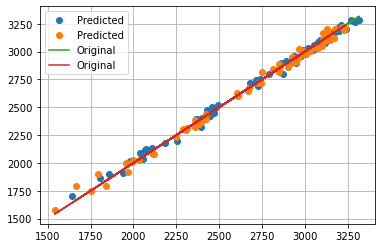

In [195]:
import matplotlib.pyplot as plt
plt.plot(y_test,y_pred,marker='o',linestyle='',label="Predicted")
plt.plot(y_test,y_test, label="Original")

plt.legend(loc='best')
plt.grid()
plt.show()

In [196]:
X_test.tail()

,Open,Close,NextOpen
136,2860.199951,2869.149902,2860.0
214,2970.000000,2954.250000,2987.0
262,3170.500000,3232.899902,3239.0
45,2061.699951,2063.899902,1971.0
226,3008.000000,3024.550049,3049.0


In [198]:
nextOpenP = 3265.00000
pred = model.predict([[openP,closeP,nextOpenP]]) 

D:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [199]:
pred

array([[3292.53114723, 3220.10220566]])

In [200]:
diff = (nextOpenP * (100-(mscore*100))/100)
print("variance = ",diff)
ph = (pred[0][0]- diff) - nextOpenP
lp = nextOpenP   -  (pred[0][1] + diff )
if ph > lp:
    profit = ph
    print("Profit/Stock  = ",ph)
    print("Buy at :",nextOpenP,'and sell at :',(pred[0][0]) - diff )
else:
    profit = lp
    print("Profit/Stock  = ",lp)
    print("sell at :",nextOpenP,'and buy at :',(pred[0][1]) + diff )

        

variance =  18.78422494904409
Profit/Stock  =  26.113569387935513
sell at : 3265.0 and buy at : 3238.8864306120645


In [201]:
stock  = int(input("How Many Stocks?\n"))
print("Your Profit is = ",profit * stock)

How Many Stocks?
20
Your Profit is =  522.2713877587103


In [127]:
28-17

11

In [129]:
97*11

1067

In [128]:
100000/1028



97.27626459143968

In [198]:
67 * 15

1005